<a href="https://colab.research.google.com/github/shrestha-bikash/Kerenel-and-KNN-density-estimation/blob/main/KDE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


In [ ]:
def euc_dist(x1, x2):
    return np.sqrt((x1 - x2)**2)
    
def gauss_func(x, mu, sd):
    return np.exp(-((x - mu)/sd)**2 / 2) / (sd * np.sqrt(2 * np.pi))

def calc_q2_signal(x):
    fx1 = 0
    fx2 = 0
    if x >= 2 and x <= 3 :
        # 1 * 0.4 = 0.4
        fx1 = 0.4 
    if( x >= 15) and (x <= 20):
        # 0.2 * 0.6 = .12
        fx2 = .12
    return fx1 + fx2

def plot_graph(x, x_d, true_dens, est_dens, n, k=0):
    plt.figure(figsize=(7, 5))
    plt.plot(x_d, true_dens, label="True (unknown) density")
    plt.plot(x_d, est_dens, label="Estimated density")
    plt.plot(x, np.full_like(x, -0.05), '|k', markeredgewidth=1.5, label= str(n) + " sample points")
    plt.title("KNN Density Estimation, K = " + str(k) + " , N = " + str(n))
    plt.legend()
    plt.xlabel('x-values')
    plt.ylabel('Density')
    plt.show()

## Question 1:  KNN method for density estimation

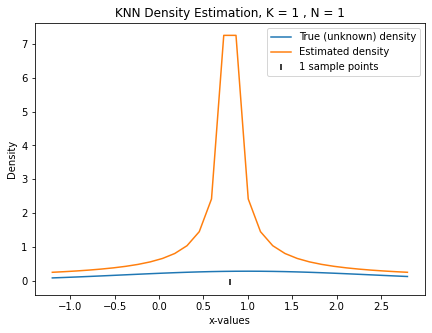

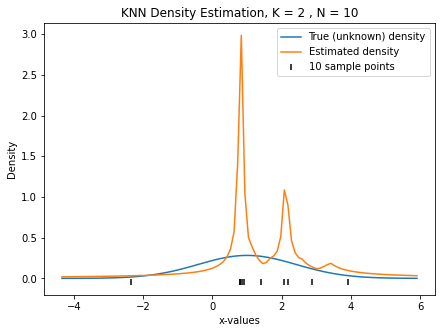

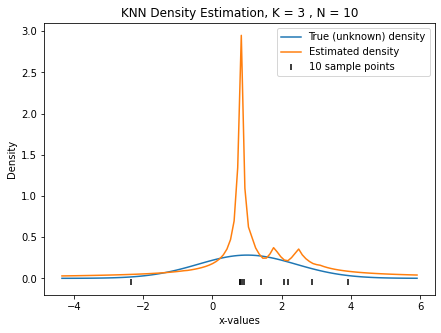

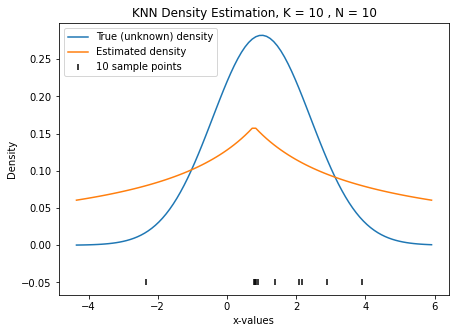

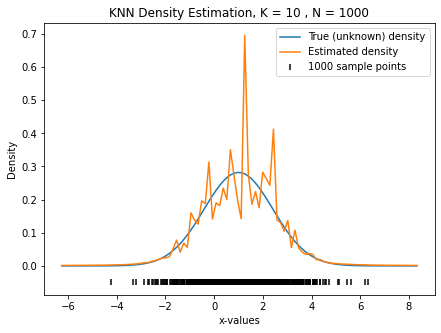

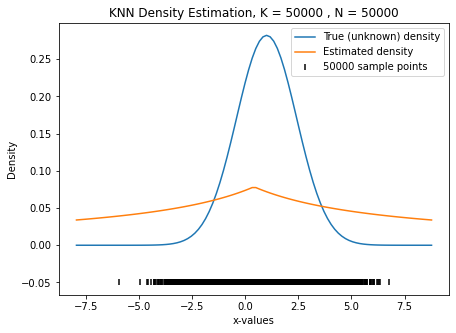

In [ ]:
m = 1
sd = np.sqrt(2)
k_n_list = [[1, 1], [2, 10], [3, 10], [10, 10], [10, 1000], [50000, 50000]]

for item in k_n_list:
    k = item[0]
    n = item[1]
    np.random.seed(99)

    # generate n normally distributed random sample points
    x = np.random.normal(1, sd, n)

    # generate linearly spaced data points
    n_lin = 100
    if n < 10:
        n_lin = 30
    x_d = np.linspace(x.min()-2, x.max()+2, n_lin)

    # calculate the true density for plotting true (unknown) density curve.
    true_dens = gauss_func(x_d, 1, sd)

    # store estimated density here
    est_dens = []
    x = sorted(x)
    for xi in x_d:
        dist = [euc_dist(xi, a) for a in x]
        dist.sort()

        # distance of the Kth nearest neighbor from the sample point
        k_dist = dist[k-1]
        
        # calculate the estimated density 
        density = k/(n * 2 * k_dist)
        
        est_dens.append(density)
    
    plot_graph(x, x_d, true_dens, est_dens, n, k)


## Question 2: Mixture of two uniform Densities

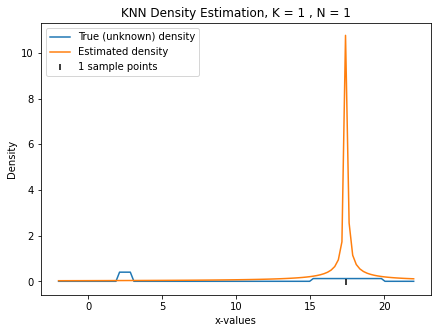

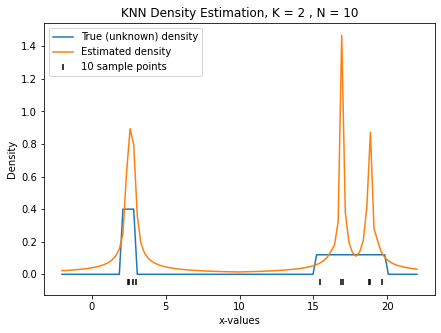

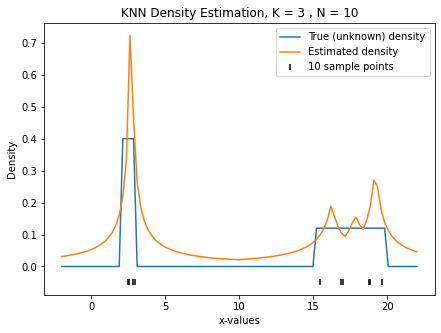

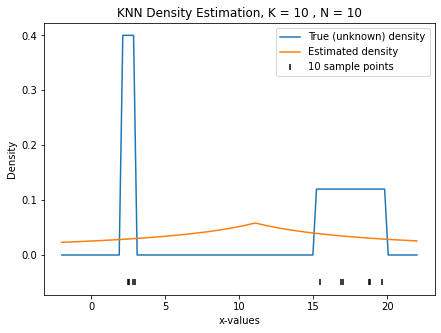

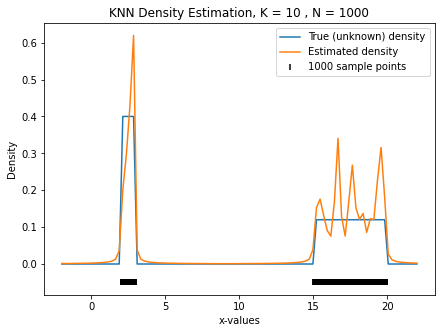

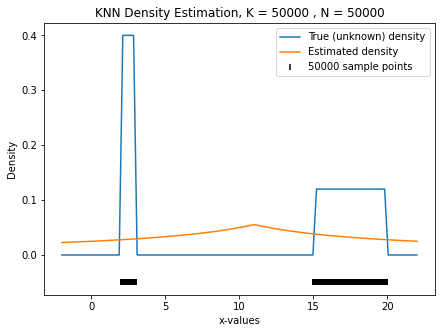

In [ ]:
for item in k_n_list:
    k = item[0]
    n = item[1]
    np.random.seed(99)

    # generate n uniform random data for selecting density function
    Z = np.random.uniform(0, 1, n)

    # generate N sample points using two mixture denstities
    x = [np.random.uniform(2,3,1)[0] if z < 0.4 else np.random.uniform(15,20,1)[0] for z in Z]

    # generate linearly spaced data points
    x_d = np.linspace(-2, 22, 100)

    # calcualte true densities for true density curve
    true_dens = [calc_q2_signal(xi) for xi in x_d]

    est_dens = []
    x = sorted(x)
    for xi in x_d:
        dist = [euc_dist(xi, a) for a in x]
        dist.sort()
        k_dist = dist[k-1]

        density = k/(n * 2 * k_dist)
        
        est_dens.append(density)
 
    plot_graph(x, x_d, true_dens, est_dens, n, k)
        

## Question 3: Desity estimation using Gaussian kernel

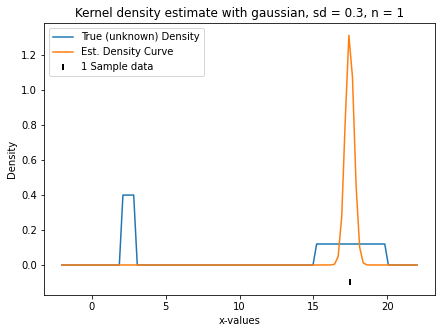

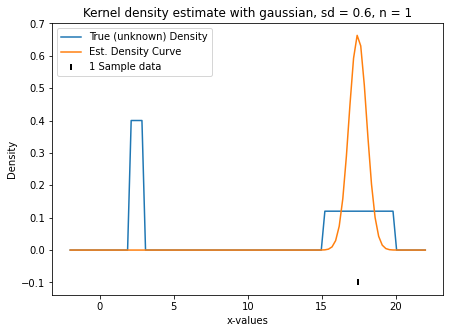

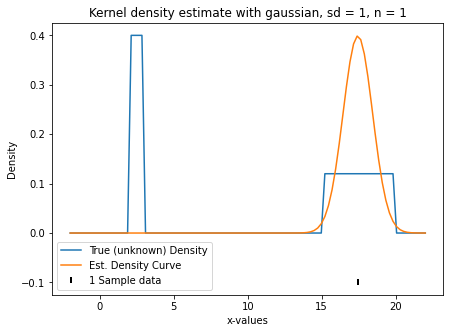

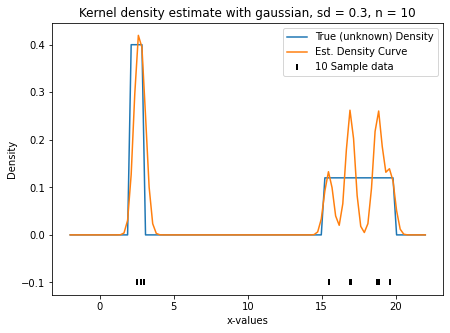

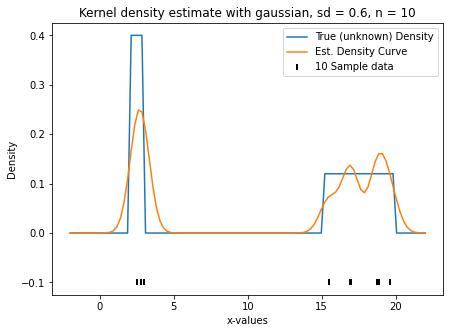

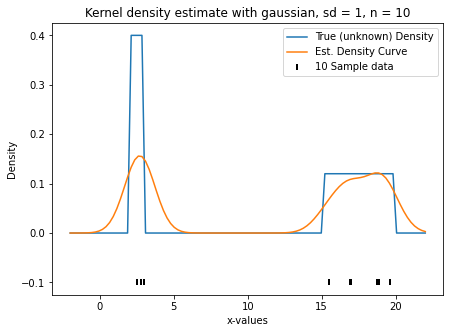

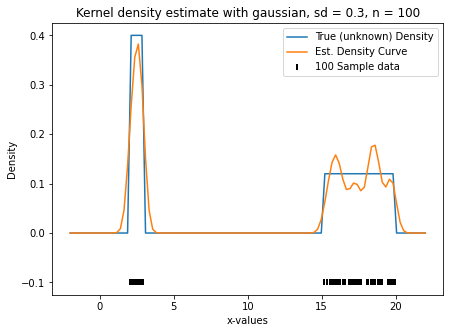

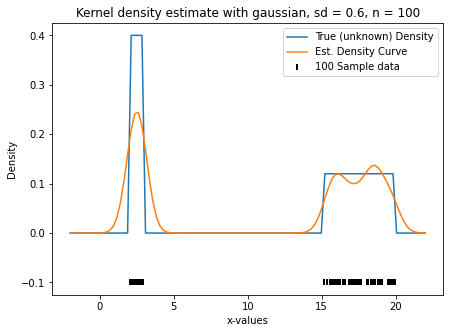

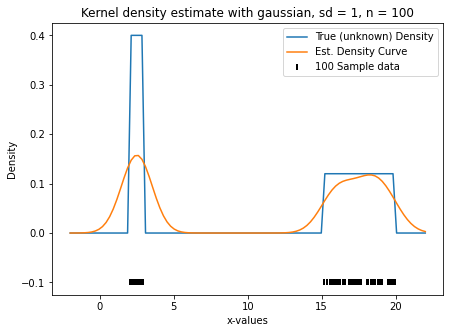

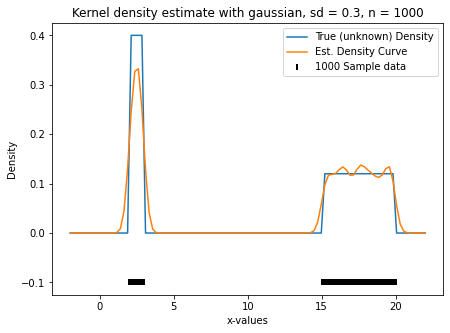

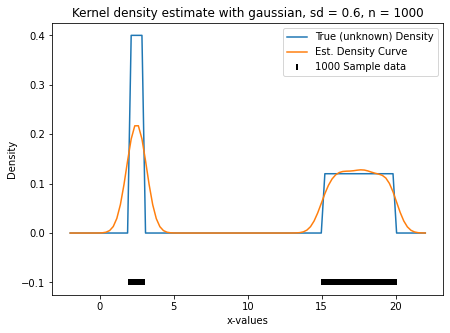

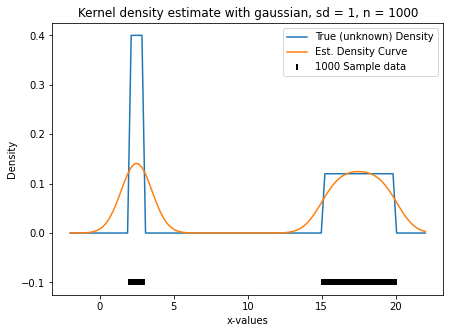

In [ ]:
# list for selecting different N sample points
n_list = [1, 10, 100, 1000]

# different standard deviations for the gaussian kernel
s_d = [0.3, 0.6, 1]

for n in n_list:
    np.random.seed(99)
    Z = np.random.uniform(0, 1, n)
    x = [np.random.uniform(2,3,1)[0] if z < 0.4 else np.random.uniform(15,20,1)[0] for z in Z]

    # generate linearly spaced data points
    x_d = np.linspace(-2, 22, 100)

    # calculate true densities for true density curve
    true_dens = [calc_q2_signal(xi) for xi in x_d]

    for sigma in s_d:
        # calculate the density for each sample points using gaussian kernel
        density = sum(gauss_func(x_d, xi, sigma) for xi in x)/n

        plt.figure(figsize=(7,5))
        plt.plot(x_d, true_dens, label='True (unknown) Density')
        plt.plot(x_d, density, label='Est. Density Curve')
        plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=2, label= f'{n} Sample data')
        plt.title(f"Kernel density estimate with gaussian, sd = {sigma}, n = {n}")
        plt.legend()
        plt.xlabel('x-values')
        plt.ylabel('Density')
        plt.show()